# Процесс разработки нового метода генерации лабиринта

In [1]:
import numpy as np
import itertools
import random
from random import getrandbits, randint
from functools import reduce
import time
import PIL.Image, PIL.ImageDraw
import pandas as pd

In [2]:
_best_ugl = [
                            " ", #0
                            "╴", #1
                            "╷", #2
                            "┐", #3
                            "╶", #4
                            "─", #5
                            "┌", #6
                            "┬", #7
                            "╵", #8
                            "┘", #9
                            "│", #10
                            "┤", #11
                            "└", #12
                            "┴", #13
                            "├", #14
                            "┼", #15
                        ]
def valid_co(x, y, n, m):
    return (x>=0) and (x<n) and (y>=0) and (y<m)
def show_nice(a):
    for id, i in enumerate(a):
        for ud, u in enumerate(i):
            print(" ", end="")
            if u[0]:
                print("─"*3, end="")
            else:
                print(" "*3, end="")
        print(" ")
        for ud, u in enumerate(i):
            if u[3]:
                print("│", end="")
            else:
                print(" ", end="")
            print(" "*3, end="")
        print("│")
    for ud, u in enumerate(i):
        print(" ", end="")
        print("─"*3, end="")
    print(" ")

In [3]:
def Kruskal(n, m):
    a = np.ones((n,m,4), dtype=np.int32)
    b = np.zeros((n,m), dtype=np.int32)
    def get_way(px,py):
        if px == 0:
            if py == 1:
                return 1
            else:
                return 3
        else:
            if px == 1:
                return 2
            else: return 0
    for i in range(n):
        for u in range(m):
            b[i,u] = i*m + u
    wall = np.array([(i,u,j) for i in range(n) for u in range(m) for j in (1,2) if ((i<n-1) or (j==1)) and ((u<m-1) or (j==2))], dtype=np.int32)
    np.random.shuffle(wall)
    for ix,iy,ij in wall:
        #print(ix, iy, ij)
        #show_nice(a)
        #print(a)
        #print(b)
        #print()
        if ij == 1:
            if b[ix, iy] != b[ix, iy+1]:
                a[ix, iy, 1] = 0
                a[ix, iy+1, 3] = 0
                if b[ix, iy] < b[ix, iy+1]:
                    link = b[ix, iy]
                    stack = [(ix, iy+1)]
                else:
                    link = b[ix, iy+1]
                    stack = [(ix, iy)]
            else:
                continue
        else:
            if b[ix, iy] != b[ix+1, iy]:
                a[ix, iy, 2] = 0
                a[ix+1, iy, 0] = 0
                if b[ix, iy] < b[ix+1, iy]:
                    link = b[ix, iy]
                    stack = [(ix+1, iy)]
                else:
                    link = b[ix+1, iy]
                    stack = [(ix, iy)]
            else:
                continue
        while stack:
            x, y = stack.pop()
            
            #print("stack=>",x,y)
            if b[x, y] == link:
                continue
            else:
                b[x, y] = link
            for px, py in ((-1, 0), (1, 0), (0, 1), (0, -1)):
                if valid_co(x+px,y+py,n,m) and (a[x,y,get_way(px,py)] == 0) and (b[x+px,y+py] != link):
                    stack.append((x+px,y+py))
    #print(b)
    return a

In [4]:
def count_no_way(a):
    nway = 0
    for i in a:
        for u in i:
            if sum(u) == 3:
                nway += 1
    return nway

In [196]:
sr = 0
for i in range(1000):
    a = Kruskal(10,10)
    sr += count_no_way(a)
print(sr, sr/1000/1)

30358 30.358


In [5]:
def B2_3(n, m):
    a = np.zeros((n+1, m+1, 4), dtype=np.int32)
    b = np.zeros((n+1, m+1), dtype=np.int32)
    for i in range(1, n):
        for u in range(1, m):
            b[i,u] = i*m + u
    p = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    def _k(k):
        return (k+2)%4
    for i in range(1, n):
        for u in range(1, m):
            good = [k for k in range(4) if b[i,u] != b[i+p[k][0],u+p[k][1]]]
            k = random.choice(good)
            ii, uu = i+p[k][0], u+p[k][1]
            a[i,u,k] = 1
            a[ii,uu,_k(k)] = 1
            #print(k, i,u,ii,uu)
            #print(a)
            #print(b)
            #print()
            if b[i,u]<b[ii,uu]:
                link = b[i,u]
                stack = [(ii,uu)]
            else:
                link = b[ii,uu]
                stack = [(i,u)]
            while stack:
                x, y = stack.pop()
                #print('stack =>', x, y)
                if b[x, y] == link:
                    continue
                else:
                    b[x, y] = link
                for k in range(4):
                    if a[x,y,k] and (b[x+p[k][0],y+p[k][1]]!=link):
                        stack.append((x+p[k][0], y+p[k][1]))
    #print(a)
    #print(b)
    return a

In [6]:
def wall_to_norm(a):
    #print("SHAPR", a.shape)
    d = np.ones((a.shape[0]-1,a.shape[1]-1,4), dtype=np.bool)
    for i in range(1, a.shape[0]):
        for u in range(1, a.shape[1]):
            if (u!=a.shape[1]-1) and (not a[i, u, 0]):
                d[i-1, u-1, 1] = False
                d[i-1, u, 3] = False
            if (i!=a.shape[0]-1) and (not a[i, u, 3]):
                d[i-1, u-1, 2] = False
                d[i, u-1, 0] = False
    return d

In [336]:
a = B2_3(10,25)
d = wall_to_norm(a)
show_nice(d)

 ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── 
│               │                       │               │                   │               │       │
 ─── ───             ─── ─── ───             ─── ───         ─── ─── ─── ─── ───     ───     ───     
│           │           │           │   │       │       │                       │   │   │           │
 ───     ─── ───     ───     ───     ─── ─── ─── ───         ─── ───     ───             ───         
│               │   │       │           │       │           │   │   │   │   │       │   │       │   │
     ─── ───     ─── ─── ─── ─── ───     ───     ───     ───                 ───             ───     
│           │               │       │           │   │   │       │           │       │           │   │
         ─── ─── ───         ───         ─── ───         ───     ─── ─── ─── ─── ───     ───     ─── 
│   │   │       │   │   │   │   │       │   │               │       │   │   │     

In [195]:
sr = 0
for i in range(1000):
    a = wall_to_norm(B2_3(10,10))
    sr += count_no_way(a)
print(sr, sr/1000/1)

28842 28.842


In [7]:
def _rr_way(a, x, y, xx, yy, z):
    if (x == a.shape[0]-1) and (y == a.shape[1]-1):
        return z
    if (not a[x,y,1]) and (y+1 != yy):
        mb = _rr_way(a, x, y+1, x, y, z+1)
        if mb is not None:
            return mb
    if (not a[x,y,2]) and (x+1 != xx):
        mb = _rr_way(a, x+1, y, x, y, z+1)
        if mb is not None:
            return mb
    if (not a[x,y,0]) and (x-1 != xx):
        mb = _rr_way(a, x-1, y, x, y, z+1)
        if mb is not None:
            return mb
    if (not a[x,y,3]) and (y-1 != yy):
        mb = _rr_way(a, x, y-1, x, y, z+1)
        if mb is not None:
            return mb
def rr_way(a):
    return _rr_way(a, 0, 0, 0, 0, 0)

In [213]:
sr = 0
for i in range(1000):
    a = wall_to_norm(B2_3(10,10))
    sr += rr_way(a)
print(sr, sr/100/10)

22692 22.692


In [214]:
sr = 0
for i in range(1000):
    a = Kruskal(10,10)
    sr += rr_way(a)
print(sr, sr/100/10)

23338 23.338


In [41]:
for i in itertools.permutations((-1, 1,), 2):
    print(i)

(-1, 1)
(1, -1)


In [8]:
def B2_4(n, m):
    a = np.zeros((n+1, m+1, 4), dtype=np.bool)
    b = np.zeros((n+1, m+1), dtype=np.int32)
    b[:,0] = 1
    b[:,-1] = 1
    b[0,:] = 1
    b[-1,:] = 1
    lost = (n-1)*(m-1)
    now = 1
    p = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    def _k(k):
        return (k+2)%4
    while lost:
        now += 1
        x, y = randint(1, n-1), randint(1, m-1)
        while (b[x, y]):
            x, y = randint(1, n-1), randint(1, m-1)
        while True:
            #print(x, y)
            #show_nice(wall_to_norm(a))
            #print(b)
            if b[x, y]!=now:
                b[x, y] = now
                lost -= 1
            good = [k for k in range(4) if b[x+p[k][0], y+p[k][1]] != now]
            if not good:
                x, y = randint(1, n-1), randint(1, m-1)
                while (b[x, y]) != now:
                    x, y = randint(1, n-1), randint(1, m-1)
                continue
            k = random.choice(good)
            xx, yy = x+p[k][0], y+p[k][1]
            #print("  ->'",xx,yy,b[xx,yy])
            a[x,y,k] = True
            a[xx,yy,_k(k)] = True
            if b[xx,yy] !=0:
                break
            x, y = xx, yy
    return a

In [251]:
a = B2_4(100, 25)
d = wall_to_norm(a)
show_nice(d)

 ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── 
│   │                       │           │                               │                   │       │
         ───     ─── ─── ───     ───     ─── ─── ───     ───     ───     ───         ───     ───     
│   │   │   │       │   │   │   │               │       │           │   │       │       │           │
                 ───                 ─── ───         ─── ─── ─── ───     ───     ─── ─── ───         
│       │   │   │       │       │       │       │   │   │       │               │           │   │   │
     ───                             ─── ───                 ─── ───     ─── ───     ───         ─── 
│       │   │   │   │       │   │   │               │   │           │   │           │   │           │
             ─── ───     ───     ───     ─── ───         ───         ─── ───     ───         ─── ─── 
│   │                   │   │       │   │               │   │   │           │     

│   │   │   │   │       │   │       │   │   │           │   │   │   │       │   │           │   │   │
                 ─── ───         ───     ─── ─── ───     ───     ─── ───             ───             
│   │   │                                       │   │               │       │   │   │   │   │       │
         ─── ───             ─── ─── ───     ───         ─── ───     ─── ───             ───     ─── 
│               │   │   │   │       │       │           │                                   │   │   │
     ───     ───     ─── ───     ───             ───             ───         ───     ───             
│   │   │   │                   │       │       │   │   │   │   │   │   │   │       │               │
 ───         ─── ───         ───     ─── ─── ───     ─── ─── ───         ───     ─── ─── ─── ───     
│       │       │       │   │           │   │                       │       │   │   │   │   │       │
 ───         ───     ─── ─── ─── ─── ───     ───     ─── ─── ───     ─── ───      

│               │       │   │   │   │   │           │   │       │   │           │   │       │       │
     ─── ───     ───                 ───     ───     ─── ───     ───     ───                 ───     
│       │                       │           │   │   │   │           │   │           │   │       │   │
     ─── ─── ─── ───                     ───                 ─── ───     ─── ─── ───     ─── ─── ─── 
│   │   │           │   │   │       │   │       │   │       │       │           │   │   │   │       │
                 ───     ───         ───                 ─── ───     ───     ───     ───     ───     
│   │   │   │   │       │   │   │       │   │   │   │           │           │                   │   │
         ───         ───         ─── ─── ───     ───     ─── ───     ─── ───     ───     ─── ───     
│   │       │   │   │                                   │   │               │       │           │   │
 ─── ───             ───     ───             ───     ───                 ─── ───  

In [254]:
sr = 0
for i in range(100):
    a = wall_to_norm(B2_4(100,100))
    sr += count_no_way(a)
print(sr, sr/100/100)

277442 27.7442


In [261]:
sr = 0
for i in range(100):
    a = wall_to_norm(B2_4(100,100))
    sr += rr_way(a)
print(sr, sr/100/100)

44360 4.436


In [9]:
def B2_5(n, m):
    a = np.zeros((n+1, m+1, 4), dtype=np.bool)
    b = np.zeros((n+1, m+1), dtype=np.int32)
    b[:,0] = 1
    b[:,-1] = 1
    b[0,:] = 1
    b[-1,:] = 1
    lost = (n-1)*(m-1)
    now = 1
    p = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    def _k(k):
        return (k+2)%4
    while lost:
        now += 1
        x, y = randint(1, n-1), randint(1, m-1)
        while (b[x, y]):
            x, y = randint(1, n-1), randint(1, m-1)
        while True:
            #print(x, y)
            #show_nice(wall_to_norm(a))
            #print(b)
            if b[x, y]!=now:
                b[x, y] = now
                lost -= 1
            good = [k for k in range(4) if (b[x+p[k][0], y+p[k][1]] > 0) and (b[x+p[k][0], y+p[k][1]] != now)]
            if not good:
                good = [k for k in range(4) if b[x+p[k][0], y+p[k][1]] != now]
            if not good:
                x, y = randint(1, n-1), randint(1, m-1)
                while (b[x, y]) != now:
                    x, y = randint(1, n-1), randint(1, m-1)
                continue
            k = random.choice(good)
            xx, yy = x+p[k][0], y+p[k][1]
            #print("  ->'",xx,yy,b[xx,yy])
            a[x,y,k] = True
            a[xx,yy,_k(k)] = True
            if b[xx,yy] !=0:
                break
            x, y = xx, yy
    return a

In [339]:
a = B2_5(100, 25)
d = wall_to_norm(a)
show_nice(d)

 ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── 
│       │   │   │   │       │   │               │       │       │   │       │       │       │   │   │
                     ───                 ─── ───         ───                             ───         
│   │               │       │   │   │               │               │   │       │       │   │       │
     ─── ─── ───     ───             ─── ───     ─── ───     ───         ─── ─── ───         ───     
│       │   │                   │   │   │   │   │   │       │   │       │   │                   │   │
     ───     ───         ─── ─── ───                 ───         ───         ─── ─── ───     ───     
│       │   │       │   │       │   │       │   │       │       │   │       │   │                   │
 ───         ───             ───     ───         ───     ─── ───         ───         ───         ─── 
│       │   │       │   │           │       │               │               │     

│       │               │       │   │   │       │   │       │   │           │       │   │   │       │
 ───             ───                 ───     ───     ─── ─── ───         ─── ───                 ─── 
│   │   │   │       │   │   │           │           │   │           │       │       │   │       │   │
             ───     ─── ─── ───             ─── ───     ───     ─── ─── ───     ───     ───         
│           │                       │           │       │   │       │       │           │       │   │
 ─── ───     ───     ─── ───     ─── ───             ───                     ─── ───         ───     
│           │               │           │   │                   │       │   │                       │
 ───     ─── ─── ───     ─── ─── ─── ─── ─── ─── ───         ─── ───     ─── ───     ───     ─── ─── 
│               │   │   │   │       │       │           │           │       │   │   │   │   │       │
         ───                         ───     ───     ─── ───     ─── ─── ───      

│   │   │   │           │   │           │       │   │   │               │       │   │   │           │
 ───         ─── ─── ───     ─── ─── ───     ───             ─── ─── ─── ───                 ─── ─── 
│       │   │               │           │   │   │               │   │   │               │   │   │   │
 ─── ───         ─── ─── ───     ─── ─── ───             ───             ───     ───     ───         
│       │   │   │       │                           │       │           │           │       │       │
     ───                 ─── ─── ─── ───         ─── ─── ─── ─── ───         ─── ─── ───         ─── 
│   │               │   │       │           │       │       │                           │           │
             ─── ───             ─── ───     ─── ───     ─── ─── ───     ─── ─── ───     ─── ───     
│       │   │           │   │           │       │       │               │   │           │           │
 ─── ─── ─── ───                 ─── ───     ─── ───     ───                 ─── ─

In [262]:
sr = 0
for i in range(100):
    a = wall_to_norm(B2_5(100,100))
    sr += count_no_way(a)
print(sr, sr/100/100)

233430 23.343000000000004


In [263]:
sr = 0
for i in range(100):
    a = wall_to_norm(B2_5(100,100))
    sr += rr_way(a)
print(sr, sr/100/100)

39900 3.99


In [265]:
sr_now_way = 0
sr_rr_way = 0
sr_time_gen = 0
for i in range(100):
    start = time.time()
    a = Kruskal(100,100)
    sr_time_gen = time.time() - start
    sr_now_way += count_no_way(a)
    sr_rr_way += rr_way(a)
print("Kruskal", sr_now_way/100/100, sr_rr_way/100/100, sr_time_gen/100, sep="\n\r\t")

Kruskal
	30.5643
	4.2406
	0.02066166400909424


In [266]:
sr_now_way = 0
sr_rr_way = 0
sr_time_gen = 0
for i in range(100):
    start = time.time()
    a = wall_to_norm(B2_3(100,100))
    sr_time_gen = time.time() - start
    sr_now_way += count_no_way(a)
    sr_rr_way += rr_way(a)
print("B2_3", sr_now_way/100/100, sr_rr_way/100/100, sr_time_gen/100, sep="\n\r\t")

B2_3
	29.4818
	2.8526
	0.0033275341987609864


In [267]:
sr_now_way = 0
sr_rr_way = 0
sr_time_gen = 0
for i in range(100):
    start = time.time()
    a = wall_to_norm(B2_4(100,100))
    sr_time_gen = time.time() - start
    sr_now_way += count_no_way(a)
    sr_rr_way += rr_way(a)
print("B2_4", sr_now_way/100/100, sr_rr_way/100/100, sr_time_gen/100, sep="\n\r\t")

B2_4
	27.6586
	4.4696
	0.007122230529785156


In [338]:
sr_now_way = 0
sr_rr_way = 0
sr_time_gen = 0
for i in range(100):
    start = time.time()
    a = wall_to_norm(B2_5(100,100))
    sr_time_gen = time.time() - start
    sr_now_way += count_no_way(a)
    sr_rr_way += rr_way(a)
print("B2_5", sr_now_way/100/100, sr_rr_way/100/100, sr_time_gen/100, sep="\n\r\t")

B2_5
	31.1169
	4.309200000000001
	0.008761427402496337


0 5
1 10
2 15
3 20
4 25
5 30
6 35
7 40


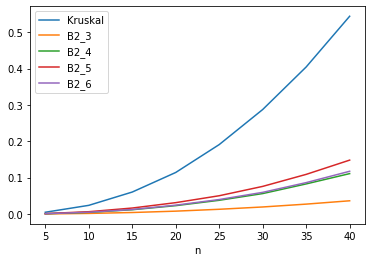

In [22]:
start_range, finish_range, step_range = 5, 41, 5
#tt = np.zeros(((finish-start)//step, 5))
sup = {"Kruskal": [], "B2_3": [], "B2_4": [], "B2_5": [], "B2_6": [],}
for id, i in enumerate(range(start_range, finish_range, step_range)):
    sr = 0
    for u in range(100):
        start = time.time()
        a = Kruskal(i, i)
        sr += time.time() - start
    #tt[id][0] = sr/100
    sup["Kruskal"].append(sr/100)
    sr = 0
    for u in range(100):
        start = time.time()
        a = B2_3(i, i)
        sr += time.time() - start
    sup["B2_3"].append(sr/100)
    sr = 0
    for u in range(100):
        start = time.time()
        a = B2_4(i, i)
        sr += time.time() - start
    sup["B2_4"].append(sr/100)
    sr = 0
    for u in range(100):
        start = time.time()
        a = B2_5(i, i)
        sr += time.time() - start
    sup["B2_5"].append(sr/100)
    sr = 0
    for u in range(100):
        start = time.time()
        a = B2_6(i, i)
        sr += time.time() - start
    sup["B2_6"].append(sr/100)
    #print(id, tt[id])
    print(id, i)
df = pd.DataFrame(sup)
df.index = range(start_range, finish_range, step_range if step_range else 1)
df.index.name = "n"
df
line = df.plot.line()

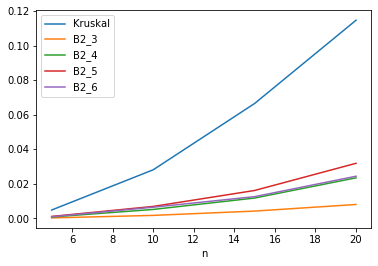

In [19]:
line = df.plot.line()

In [16]:
start

1586011834.7239497

In [10]:
def B2_6(n, m):
    a = np.zeros((n+1, m+1, 4), dtype=np.bool)
    b = np.zeros((n+1, m+1), dtype=np.int32)
    b[:,0] = 1
    b[:,-1] = 1
    b[0,:] = 1
    b[-1,:] = 1
    lost = (n-1)*(m-1)
    now = 1
    p = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    def _k(k):
        return (k+2)%4
    while lost:
        now += 1
        x, y = randint(1, n-1), randint(1, m-1)
        while (b[x, y]):
            x, y = randint(1, n-1), randint(1, m-1)
        while True:
            #print(x, y)
            #show_nice(wall_to_norm(a))
            #print(b)
            if b[x, y]!=now:
                b[x, y] = now
                lost -= 1
            good = [k for k in range(4) if b[x+p[k][0], y+p[k][1]] != now]
            if not good:
                x, y = randint(1, n-1), randint(1, m-1)
                while (b[x, y]) != now:
                    x, y = randint(1, n-1), randint(1, m-1)
                continue
            for i in range(len(good)):
                if good[i]%2==((x)+(y))%2:
                    for u in range(1):
                        good.append(good[i])
            k = random.choice(good)
            xx, yy = x+p[k][0], y+p[k][1]
            #print("  ->'",xx,yy,b[xx,yy])
            a[x,y,k] = True
            a[xx,yy,_k(k)] = True
            if b[xx,yy] !=0:
                break
            x, y = xx, yy
    return a

In [335]:
a = B2_6(25, 25)
d = wall_to_norm(a)
show_nice(d)

 ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── 
│   │           │           │               │                           │           │               │
     ─── ───         ─── ─── ─── ─── ───     ───         ───     ───             ───     ─── ───     
│               │                       │       │   │   │   │       │       │       │       │       │
             ─── ───         ───     ───         ───         ───     ───     ─── ───         ─── ─── 
│   │   │           │   │   │               │                   │       │   │           │   │       │
 ─── ───     ─── ───     ─── ─── ─── ─── ───     ─── ───         ─── ─── ─── ─── ───     ───     ─── 
│               │       │                   │   │   │   │   │       │   │       │       │           │
 ───     ───             ─── ─── ───     ───             ───     ───         ─── ───         ───     
│   │       │   │   │           │                   │   │       │               │ 

In [330]:
sr_now_way = 0
sr_rr_way = 0
sr_time_gen = 0
for i in range(20):
    start = time.time()
    a = wall_to_norm(B2_6(100,100))
    sr_time_gen += time.time() - start
    sr_now_way += count_no_way(a)
    sr_rr_way += rr_way(a)
print("B2_6", sr_now_way/20/100, sr_rr_way/20/100, sr_time_gen/20, sep="\n\r\t")

B2_6
	34.568000000000005
	4.409
	0.916896378993988


In [2]:
import wallgen

In [87]:
def get_image(a, w=None, h=None, cell=32, w_wall = 2, way=None, color_start=None, color_finish=None, w_wall_line=0):
    m, n = len(a[0]), len(a)
    if not w:
        w = cell*m
    if not h:
        h = cell*n
    cell = (w/m, h/n)
    img = PIL.Image.new('RGB', (h, w), color = 'white')
    draw = PIL.ImageDraw.Draw(img)
    if way:
        if not self.good_way:
            self.find_way()
        my_way = self.get_coord_way()
        for x, y in my_way:
            draw.rectangle([x*cell[0],y*cell[1],(x+1)*cell[0],(y+1)*cell[1]],fill=way)
    if color_finish:
        draw.rectangle([w-cell[0],h-cell[1],w,h],fill=color_finish)
    if color_start:
        draw.rectangle([0,0,cell[0],cell[1]],fill=color_start)
    draw.line([0,w-1,h-1,w-1,h-1,0], fill='black', width=1)
    draw.line([0,0,0,w], fill='black', width=w_wall)
    draw.line([h-1-w_wall//2,0,h-1-w_wall//2,w], fill='black', width=w_wall)
    draw.line([0,0,h,0], fill='black', width=w_wall)
    draw.line([0,w-1-w_wall//2,h,w-1-w_wall//2], fill='black', width=w_wall)
    for id, i in enumerate(a):
        for ud, u in enumerate(i):
            if u[0]:
                draw.line([id*cell[0]+w_wall//2,ud*cell[1]-w_wall//2,id*cell[0]+w_wall//2,(ud+1)*cell[1]+w_wall//2], fill='black', width=w_wall)
            if u[3]:
                draw.line([id*cell[0]-w_wall//2,ud*cell[1]+w_wall//2,(id+1)*cell[0]+w_wall//2,ud*cell[1]+w_wall//2], fill='black', width=w_wall)
            if u[2]:
                draw.line([(id+1)*cell[0]-w_wall//2,ud*cell[1]-w_wall//2,(id+1)*cell[0]-w_wall//2,(ud+1)*cell[1]+w_wall//2], fill='black', width=w_wall)
            if u[1]:
                draw.line([id*cell[0]-w_wall//2,(ud+1)*cell[1]-w_wall//2,(id+1)*cell[0]+w_wall//2,(ud+1)*cell[1]-w_wall//2], fill='black', width=w_wall)
            if w_wall_line:
                draw.line([id*cell[0],ud*cell[1],id*cell[0],(ud+1)*cell[1]+w_wall//2], fill='black', width=w_wall_line)
                draw.line([id*cell[0],ud*cell[1],(id+1)*cell[0]+w_wall//2,ud*cell[1]], fill='black', width=w_wall_line)
                draw.line([(id+1)*cell[0],ud*cell[1]-w_wall//2,(id+1)*cell[0],(ud+1)*cell[1]], fill='black', width=w_wall_line)
                draw.line([id*cell[0]-w_wall//2,(ud+1)*cell[1],(id+1)*cell[0],(ud+1)*cell[1]], fill='black', width=w_wall_line)
            
    return img.transpose(PIL.Image.FLIP_LEFT_RIGHT).transpose(PIL.Image.ROTATE_90)

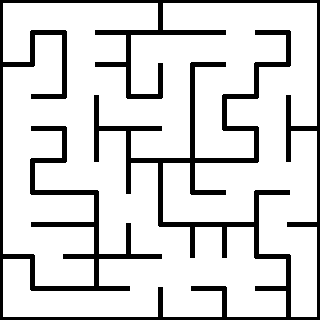

In [96]:
im = get_image(a)
im

In [28]:
help(im)

Help on Image in module PIL.Image object:

class Image(builtins.object)
 |  This class represents an image object.  To create
 |  :py:class:`~PIL.Image.Image` objects, use the appropriate factory
 |  functions.  There's hardly ever any reason to call the Image constructor
 |  directly.
 |  
 |  * :py:func:`~PIL.Image.open`
 |  * :py:func:`~PIL.Image.new`
 |  * :py:func:`~PIL.Image.frombytes`
 |  
 |  Methods defined here:
 |  
 |  __copy__ = copy(self)
 |  
 |  __del__(self)
 |  
 |  __enter__(self)
 |      # Context manager support
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __exit__(self, *args)
 |  
 |  __getstate__(self)
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __ne__(self, other)
 |      Return self!=value.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __setstate__(self, state)
 |  
 |  alpha_composite(self, im, dest=(0, 0), source=(0, 0))
 |      'In-place' analog of Image.alpha_com

In [95]:
a = wall_to_norm(B2_6(10,10))

In [93]:
show_nice(a)

 ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── 
│               │   │       │           │
         ─── ───     ───         ───     
│   │   │                           │   │
 ───     ─── ─── ─── ───     ───     ─── 
│           │               │   │   │   │
 ───     ─── ───     ─── ───     ───     
│               │       │               │
 ───     ───         ───         ───     
│       │   │               │   │   │   │
 ───         ─── ─── ─── ─── ───         
│       │   │   │       │       │       │
     ───             ─── ───     ───     
│   │       │               │       │   │
         ───     ───     ───     ───     
│   │               │   │   │   │   │   │
     ───     ───     ───                 
│       │       │           │           │
     ─── ─── ───             ───         
│   │               │   │           │   │
 ─── ─── ─── ─── ─── ─── ─── ─── ─── ─── 


In [17]:
a.shape

(6, 10, 4)

In [111]:
ims = []
def __B2_6(n, m):
    global ims
    a = np.zeros((n+1, m+1, 4), dtype=np.bool)
    b = np.zeros((n+1, m+1), dtype=np.int32)
    ims.append(get_image(wall_to_norm(a)))
    b[:,0] = 1
    b[:,-1] = 1
    b[0,:] = 1
    b[-1,:] = 1
    lost = (n-1)*(m-1)
    now = 1
    p = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    def _k(k):
        return (k+2)%4
    while lost:
        now += 1
        x, y = randint(1, n-1), randint(1, m-1)
        while (b[x, y]):
            x, y = randint(1, n-1), randint(1, m-1)
        while True:
            #print(x, y)
            #show_nice(wall_to_norm(a))
            #print(b)
            if b[x, y]!=now:
                b[x, y] = now
                lost -= 1
            good = [k for k in range(4) if b[x+p[k][0], y+p[k][1]] != now]
            if not good:
                x, y = randint(1, n-1), randint(1, m-1)
                while (b[x, y]) != now:
                    x, y = randint(1, n-1), randint(1, m-1)
                continue
            for i in range(len(good)):
                if good[i]%2==((x)+(y))%2:
                    for u in range(1):
                        good.append(good[i])
            k = random.choice(good)
            xx, yy = x+p[k][0], y+p[k][1]
            #print("  ->'",xx,yy,b[xx,yy])
            a[x,y,k] = True
            a[xx,yy,_k(k)] = True
            ims.append(get_image(wall_to_norm(a)))
            if b[xx,yy] !=0:
                break
            x, y = xx, yy
    return a
a = __B2_6(10,10)
for i in range(20):
    ims.append(ims[-1])
ims[0].save('B2_6.gif', format='gif', save_all=True, append_images=ims, disposal=2, optimize=True, loop=0)

In [112]:
ims = []
def __B2_5(n, m):
    global ims
    a = np.zeros((n+1, m+1, 4), dtype=np.bool)
    b = np.zeros((n+1, m+1), dtype=np.int32)
    ims.append(get_image(wall_to_norm(a)))
    b[:,0] = 1
    b[:,-1] = 1
    b[0,:] = 1
    b[-1,:] = 1
    lost = (n-1)*(m-1)
    now = 1
    p = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    def _k(k):
        return (k+2)%4
    while lost:
        now += 1
        x, y = randint(1, n-1), randint(1, m-1)
        while (b[x, y]):
            x, y = randint(1, n-1), randint(1, m-1)
        while True:
            #print(x, y)
            #show_nice(wall_to_norm(a))
            #print(b)
            if b[x, y]!=now:
                b[x, y] = now
                lost -= 1
            good = [k for k in range(4) if (b[x+p[k][0], y+p[k][1]] > 0) and (b[x+p[k][0], y+p[k][1]] != now)]
            if not good:
                good = [k for k in range(4) if b[x+p[k][0], y+p[k][1]] != now]
            if not good:
                x, y = randint(1, n-1), randint(1, m-1)
                while (b[x, y]) != now:
                    x, y = randint(1, n-1), randint(1, m-1)
                continue
            k = random.choice(good)
            xx, yy = x+p[k][0], y+p[k][1]
            #print("  ->'",xx,yy,b[xx,yy])
            a[x,y,k] = True
            a[xx,yy,_k(k)] = True
            ims.append(get_image(wall_to_norm(a)))
            if b[xx,yy] !=0:
                break
            x, y = xx, yy
    return a
a = __B2_5(10,10)
for i in range(20):
    ims.append(ims[-1])
ims[0].save('B2_5.gif', format='gif', save_all=True, append_images=ims, disposal=2, optimize=True, loop=0)

In [113]:
ims = []
def __B2_4(n, m):
    global ims
    a = np.zeros((n+1, m+1, 4), dtype=np.bool)
    b = np.zeros((n+1, m+1), dtype=np.int32)
    ims.append(get_image(wall_to_norm(a)))
    b[:,0] = 1
    b[:,-1] = 1
    b[0,:] = 1
    b[-1,:] = 1
    lost = (n-1)*(m-1)
    now = 1
    p = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    def _k(k):
        return (k+2)%4
    while lost:
        now += 1
        x, y = randint(1, n-1), randint(1, m-1)
        while (b[x, y]):
            x, y = randint(1, n-1), randint(1, m-1)
        while True:
            #print(x, y)
            #show_nice(wall_to_norm(a))
            #print(b)
            if b[x, y]!=now:
                b[x, y] = now
                lost -= 1
            good = [k for k in range(4) if b[x+p[k][0], y+p[k][1]] != now]
            if not good:
                x, y = randint(1, n-1), randint(1, m-1)
                while (b[x, y]) != now:
                    x, y = randint(1, n-1), randint(1, m-1)
                continue
            k = random.choice(good)
            xx, yy = x+p[k][0], y+p[k][1]
            #print("  ->'",xx,yy,b[xx,yy])
            a[x,y,k] = True
            a[xx,yy,_k(k)] = True
            ims.append(get_image(wall_to_norm(a)))
            if b[xx,yy] !=0:
                break
            x, y = xx, yy
    return a
a = __B2_4(10,10)
for i in range(20):
    ims.append(ims[-1])
ims[0].save('B2_4.gif', format='gif', save_all=True, append_images=ims, disposal=2, optimize=True, loop=0)

In [114]:
ims = []
def __B2_3(n, m):
    global ims
    a = np.zeros((n+1, m+1, 4), dtype=np.int32)
    b = np.zeros((n+1, m+1), dtype=np.int32)
    ims.append(get_image(wall_to_norm(a)))
    for i in range(1, n):
        for u in range(1, m):
            b[i,u] = i*m + u
    p = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    def _k(k):
        return (k+2)%4
    for i in range(1, n):
        for u in range(1, m):
            good = [k for k in range(4) if b[i,u] != b[i+p[k][0],u+p[k][1]]]
            k = random.choice(good)
            ii, uu = i+p[k][0], u+p[k][1]
            a[i,u,k] = 1
            a[ii,uu,_k(k)] = 1
            ims.append(get_image(wall_to_norm(a)))
            #print(k, i,u,ii,uu)
            #print(a)
            #print(b)
            #print()
            if b[i,u]<b[ii,uu]:
                link = b[i,u]
                stack = [(ii,uu)]
            else:
                link = b[ii,uu]
                stack = [(i,u)]
            while stack:
                x, y = stack.pop()
                #print('stack =>', x, y)
                if b[x, y] == link:
                    continue
                else:
                    b[x, y] = link
                for k in range(4):
                    if a[x,y,k] and (b[x+p[k][0],y+p[k][1]]!=link):
                        stack.append((x+p[k][0], y+p[k][1]))
    #print(a)
    #print(b)
    return a
a = __B2_3(10,10)
for i in range(20):
    ims.append(ims[-1])
ims[0].save('B2_3.gif', format='gif', save_all=True, append_images=ims, disposal=2, optimize=True, loop=0)

In [115]:
ims = []
def __Kruskal(n, m):
    global ims
    a = np.ones((n,m,4), dtype=np.int32)
    b = np.zeros((n,m), dtype=np.int32)
    ims.append(get_image((a)))
    def get_way(px,py):
        if px == 0:
            if py == 1:
                return 1
            else:
                return 3
        else:
            if px == 1:
                return 2
            else: return 0
    for i in range(n):
        for u in range(m):
            b[i,u] = i*m + u
    wall = np.array([(i,u,j) for i in range(n) for u in range(m) for j in (1,2) if ((i<n-1) or (j==1)) and ((u<m-1) or (j==2))], dtype=np.int32)
    np.random.shuffle(wall)
    for ix,iy,ij in wall:
        #print(ix, iy, ij)
        #show_nice(a)
        #print(a)
        #print(b)
        #print()
        if ij == 1:
            if b[ix, iy] != b[ix, iy+1]:
                a[ix, iy, 1] = 0
                a[ix, iy+1, 3] = 0
                ims.append(get_image((a)))
                if b[ix, iy] < b[ix, iy+1]:
                    link = b[ix, iy]
                    stack = [(ix, iy+1)]
                else:
                    link = b[ix, iy+1]
                    stack = [(ix, iy)]
            else:
                continue
        else:
            if b[ix, iy] != b[ix+1, iy]:
                a[ix, iy, 2] = 0
                a[ix+1, iy, 0] = 0
                ims.append(get_image((a)))
                if b[ix, iy] < b[ix+1, iy]:
                    link = b[ix, iy]
                    stack = [(ix+1, iy)]
                else:
                    link = b[ix+1, iy]
                    stack = [(ix, iy)]
            else:
                continue
        while stack:
            x, y = stack.pop()
            
            #print("stack=>",x,y)
            if b[x, y] == link:
                continue
            else:
                b[x, y] = link
            for px, py in ((-1, 0), (1, 0), (0, 1), (0, -1)):
                if valid_co(x+px,y+py,n,m) and (a[x,y,get_way(px,py)] == 0) and (b[x+px,y+py] != link):
                    stack.append((x+px,y+py))
    #print(b)
    return a
a = __Kruskal(10,10)
for i in range(20):
    ims.append(ims[-1])
ims[0].save('Kruskal.gif', format='gif', save_all=True, append_images=ims, disposal=2, optimize=True, loop=0)